# Feedbacks From Twitter

The purpose of this project is to work with new libraries and packages.
In this notebook, tweets are gathered to give feedbacks on a specific topic the user chooses such as books, movies, services, arguments. I worked with new libraries and packages such as snscrape and transformers. Snscrape is a library used to scrape tweets throught Twitter's API. Then the tweets are stored in a dataframe. Using pipeline in the transformers package, sentiment analysis was used to classify the tweets texts as negative or positive.  


In [134]:
import pandas as pd
import snscrape.modules.twitter as twitter
import matplotlib.pyplot as plt
from transformers import pipeline

500 tweets are gathered for the last year.


In [116]:
print('Enter the keywords and separate them with "AND" as the example below and try to be specific with your search ')
print('To find recommendations about Pride and Prejudice, enter: pride and prejudice AND book AND movie ')
print('Now your turn!!')
name = input("Enter keywords : ")
search = name + " since:2021-01-01 until:2022-01-01"
item = twitter.TwitterSearchScraper(search, False).get_items()
tweets_list = []


def read_tweets():
    for i, tweet in enumerate(item):
        if i < 500:
            tweets_list.append({
                "id": tweet.id,
                "Text": tweet.content,
                "tweet_date": tweet.date,
                "User_Id": tweet.user.id,
                "UserName": tweet.user.username,
                "display_name": tweet.user.username,
            })
    return tweets_list

#Depending on the search keywords, it might take much more time to find the 500 tweets.
# We can decrease the number of tweets or the start and end date of the tweets.

Enter the keywords and separate them with "AND" as the example below and try to be specific with your search 
To find recommendations about Pride and Prejudice, enter: pride and prejudice AND book AND movie 
Now your turn!!
Enter keywords : pride and prejudice AND book AND movie


In [117]:
data = pd.DataFrame(read_tweets())
df = data[['id', 'Text', 'tweet_date', 'User_Id', 'UserName', 'display_name']]
df.head(10)

id                                               Text  \
0  1476991317783633923  @san_standee A few days ago, I finished watchi...   
1  1476953313291771904  Pride and Prejudice is my FAVORITE movie and b...   
2  1476703508946722820  I’m 5 hours deep into the pride and prejudice ...   
3  1476665802837352451  i’m watching pride and prejudice 2005 ver now ...   
4  1476575809217327107  PRIDE AND PREJUDICE AAAAA MADE ME BELIEVE IN L...   
5  1476526289284571140  I watched pride and prejudice and now I'm read...   
6  1476183710571630594  So Pride and Prejudice (2005) is a very pretty...   
7  1476160231763759104  My new goal is to watch the movie of the book ...   
8  1476130716077506560  10 movies to know me! In no particular order:\...   
9  1475930364610682882  Some favorites, comment if you want to be moot...   

                 tweet_date              User_Id         UserName  \
0 2021-12-31 18:59:05+00:00           3170138724      mycatsmom99   
1 2021-12-31 16:28:05+00:00  1341027917531328518       PoppinTeab   
2 2021-12-30 23:55:27+00:00             17166530       milk_farts   
3 2021-12-30 21:25:37+00:00  1000733064555835392         pawattwt   
4 2021-12-30 15:28:01+00:00  1282608097983451136  mugiwarameowbel   
5 2021-12-30 12:11:14+00:00  1363766513094721538       pixidvstt2   
6 2021-12-29 13:29:57+00:00           2699231579    radiofreepony   
7 2021-12-29 11:56:39+00:00   731823721883672577            kw6ur   
8 2021-12-29 09:59:22+00:00             53789336    this_is_idril   
9 2021-12-28 20:43:15+00:00  1474183661821988884       Ataraxia54   

      display_name  
0      mycatsmom99  
1       PoppinTeab  
2       milk_farts  
3         pawattwt  
4  mugiwarameowbel  
5       pixidvstt2  
6    radiofreepony  
7            kw6ur  
8    this_is_idril  
9       Ataraxia54

The tweets are gathered in a dataframe with the text, username, user id, display name and tweet date. 

In [118]:
df.describe()

id       User_Id
count  5.000000e+02  5.000000e+02
mean   1.432480e+18  8.297692e+17
std    2.660304e+16  5.854495e+17
min    1.387470e+18  2.185300e+04
25%    1.408691e+18  2.522332e+09
50%    1.433346e+18  1.105417e+18
75%    1.455572e+18  1.337528e+18
max    1.476991e+18  1.474184e+18

Sentiment analysis or sentiment classification fall into the broad category of text classification tasks where you are supplied with a phrase, or a list of phrases and your classifier is supposed to tell if the sentiment behind that is positive, negative or neutral.


In [119]:
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are 

In [120]:
df1 = (
    data
    .assign(sentiment = lambda x: x['Text'].apply(lambda s: sentiment_classifier(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)
#Adding the score and label column after adding the tweet text to the sentiment pipeline

In [121]:
df1.head()

id                                               Text  \
0  1476991317783633923  @san_standee A few days ago, I finished watchi...   
1  1476953313291771904  Pride and Prejudice is my FAVORITE movie and b...   
2  1476703508946722820  I’m 5 hours deep into the pride and prejudice ...   
3  1476665802837352451  i’m watching pride and prejudice 2005 ver now ...   
4  1476575809217327107  PRIDE AND PREJUDICE AAAAA MADE ME BELIEVE IN L...   

                 tweet_date              User_Id         UserName  \
0 2021-12-31 18:59:05+00:00           3170138724      mycatsmom99   
1 2021-12-31 16:28:05+00:00  1341027917531328518       PoppinTeab   
2 2021-12-30 23:55:27+00:00             17166530       milk_farts   
3 2021-12-30 21:25:37+00:00  1000733064555835392         pawattwt   
4 2021-12-30 15:28:01+00:00  1282608097983451136  mugiwarameowbel   

      display_name                                          sentiment  \
0      mycatsmom99  [{'label': 'POSITIVE', 'score': 0.999590098857...   
1       PoppinTeab  [{'label': 'NEGATIVE', 'score': 0.877970516681...   
2       milk_farts  [{'label': 'NEGATIVE', 'score': 0.969868183135...   
3         pawattwt  [{'label': 'NEGATIVE', 'score': 0.998380780220...   
4  mugiwarameowbel  [{'label': 'POSITIVE', 'score': 0.998757481575...   

      label     score  
0  POSITIVE  0.999590  
1  NEGATIVE  0.877971  
2  NEGATIVE  0.969868  
3  NEGATIVE  0.998381  
4  POSITIVE  0.998757

In [127]:
counts = df1['label'].value_counts()
counts

POSITIVE    302
NEGATIVE    198
Name: label, dtype: int64

In [128]:

positive_review = counts['POSITIVE']
negative_review = counts['NEGATIVE']
tweets_number = positive_review + negative_review
percentage_positive = (positive_review/tweets_number)*100
percentage_negative = (negative_review/tweets_number)*100
print('The percentage of the people supporting the topic : ',percentage_positive)
print('The percentage of the people against the topic : ',percentage_negative)

The percentage of the people supporting the topic :  60.4
The percentage of the people against the topic :  39.6


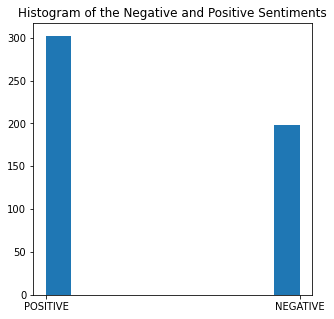

In [129]:
plt.figure(figsize=(5,5))
plt.hist(df1['label'])
plt.title('Histogram of the Negative and Positive Sentiments')
plt.show()


In the following cells, the top 5 users with the highest score for the positive tweets are displayed.

In [130]:
with_ = df1.loc[df1['label'] == 'POSITIVE']
with_ = with_vaccine.nlargest(n=5,columns='score')
with_[['display_name','score']]

display_name     score
27  Ineffable_Panda  0.999870
94  paulapuddephatt  0.999823
66        Linked333  0.999767
98    graysonsgurll  0.999704
31   ItsTheLoweDown  0.999598

The top 5 users with the highest score for the negative tweets are displayed.

In [131]:
anti_ = df1.loc[df1['label'] == 'NEGATIVE']
anti_ = anti_vaccine.nlargest(n=5,columns='score')
anti_[['display_name','score']]

display_name     score
26  Curt_Is_Devine  0.999777
10         orlabaz  0.999766
67       RPickell1  0.999551
72          luxiix  0.999165
38      queenleahy  0.999109